<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Machine-Learning/blob/master/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: EM Clustering in 2D**
-------------------------------

You have seen how the **Expectation-Maximization (EM)** algorithm can fit a Gaussian Mixture Model (GMM) to a 2D dataset. You should now explore:

## **Primary Question**

**How can we visualize the *decision boundary* for attributing a *new* (unlabeled) point to one of the GMM clusters?**  

In other words, given a 2D data distribution modeled by EM, think of a way to clearly show (on a plot) *which* cluster a point would be assigned to (or which cluster has the highest responsibility (posterior probability) for that point)?  

The plot should comprehensively cover the entire visible region, ensuring that for any point on the plot, it is immediately evident which cluster it would belong to. You can plot **lines** separating clusters or use a **color map** showing each point's "most likely cluster".

You can illustrate your approach with **the same** 2D dataset that we used in class, or you can find another suitable 2D dataset, it's up to you. Note however, that having 3 clusters enhances the clarity of the visualization—while 2 clusters result in overly simple boundaries, using 4 or more clusters can make the entire plot difficult to interpret. Try to choose a dataset with 3 clusters.

Discuss any irregularities observed in the resulting plot. If a decision boundary suggests that a region should be attributed to a cluster in a counterintuitive way (we saw it in class!), provide an explanation for why this might occur. It may be also an indication you have a bug in your code.

## **Secondary Question**

**If we *didn't know* the number of clusters in advance, how could we decide on a suitable $K$ for the clustering algorithm?**  

You can illustrate your approach with **the same** dataset as in the primary question by trying different values of $K$ (and optionally plotting the evaluation metric values, e.g. silhouette scores, etc.). Or you can find another suitable dataset, it's up to you. Note, that the dataset doesn't need to be 2D in this task.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code (e.g. `scikit-learn` for GMM) to visualize:
       1. The **data** and **cluster assignments**.
       2. The **decision boundary** (lines or a color map) indicating each cluster's region.
       3. A demonstration (chart or table) of how you would pick a suitable number of clusters $K$ when it is not known.
   - Remember to use the `$` symbol to delimit **inline equations** and `$$` to delimit **full-line equations**.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.



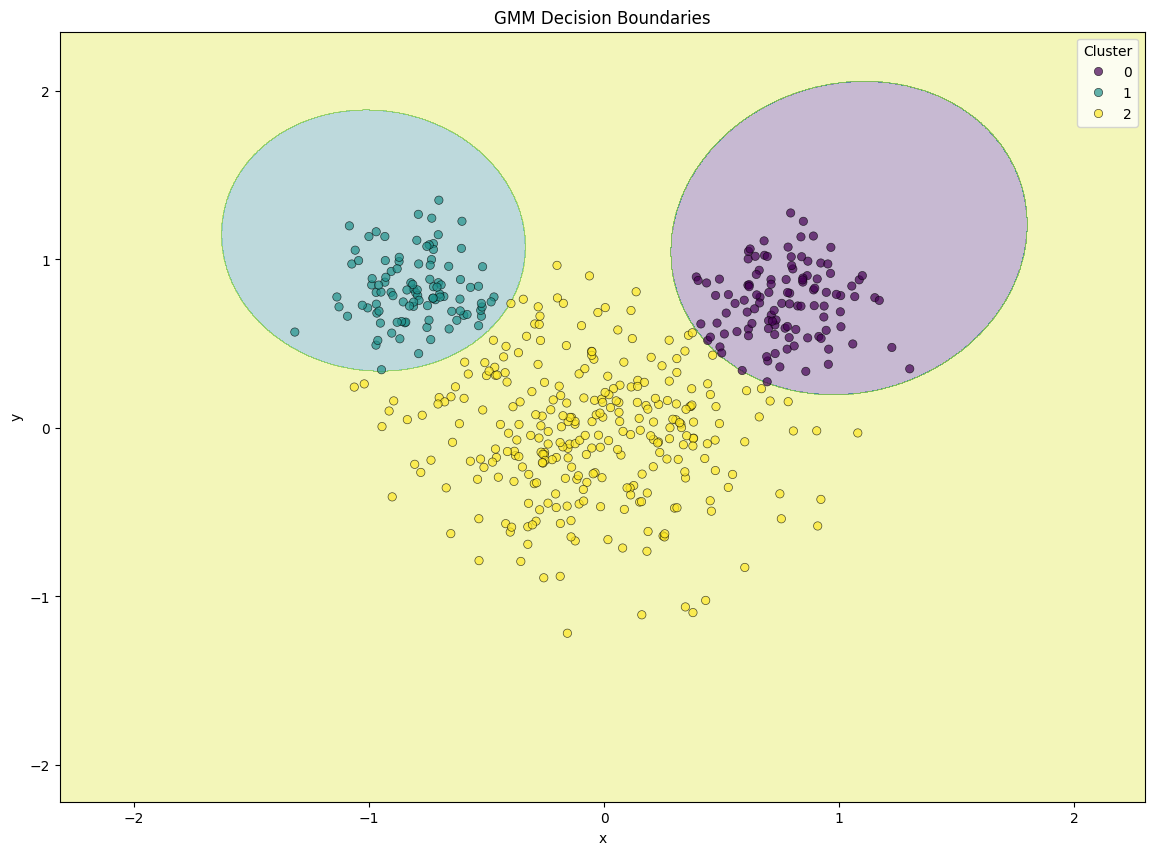

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

## generating dataset as shown during classes

# Generate the "mouse" dataset
np.random.seed(0)

# Cluster 1
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0], [0.0, 0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

# Cluster 2
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0], [0.0, 0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# Cluster 3
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0], [0.0, 0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# Combine data
data_X = np.vstack([data1, data2, data3])

# Fit GMM with 3 clusters
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(data_X)

## end of the code code from the classes




# setting boundaries for coordinate grid
x_min = data_X[:, 0].min() - 1
x_max = data_X[:, 0].max() + 1
y_min = data_X[:, 1].min() - 1
y_max = data_X[:, 1].max() + 1

# generating 2000x2000 grid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 2000), np.linspace(y_min, y_max, 2000))

# transforming 2000x2000 grid into 4000000 x 2 matrix
grid = np.c_[xx.ravel(), yy.ravel()]

# running gmm.predict_prob which gives us matrix representing (for each point from mesh grid) probabilities of being assigned to each cluster
prob = gmm.predict_proba(grid)

# for each row from matrix prob, which_cluster chooses the one with greatest probability
which_cluster = np.argmax(prob, axis=1)

# transforming which_cluster matrix into 2000x2000 matrix
which_cluster_2d = which_cluster.reshape(xx.shape)

# drawing plot representing decision boundaries
plt.figure(figsize=(14, 10))
plt.contourf(xx, yy, which_cluster_2d, alpha=0.3, cmap='viridis')
sns.scatterplot(x=data_X[:, 0], y=data_X[:, 1], hue=gmm.predict(data_X), palette='viridis', edgecolor = 'k', alpha=0.7)

plt.title("GMM Decision Boundaries")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(title="Cluster")
plt.show()

**Primary Question**

**How can we visualize the *decision boundary* for attributing a *new* (unlabeled) point to one of the GMM clusters?**  

Powyższy kod pozwala zwizualizować granice decyzyjne dla algorytmu EM. Kod tworzy gęstą siatkę punktów na tym obszarze i, następnie, dla każdego punktu wyznacza klaster, do którego najprawdopodobniej będzie należeć ten punkt.Wątpliwości może budzić fakt, iż żółte pole zajmuje znaczną część obszaru w porównaniu z zielonym i fioletowym polem, jednak nie jest to błąd. Dzieje się tak, gdyż algorytm EM dochodzi do liczb bliskich orginalnym parametrom rozkładów normalnych i zauważa, iż żółty zbiór ma największa wariancję. Dlatego, dalekie punkty (z obrzeży obszaru wyświetlanego powyżej) mają najwyższe prawdopodobieństwo przynależności do żółtego zbioru.

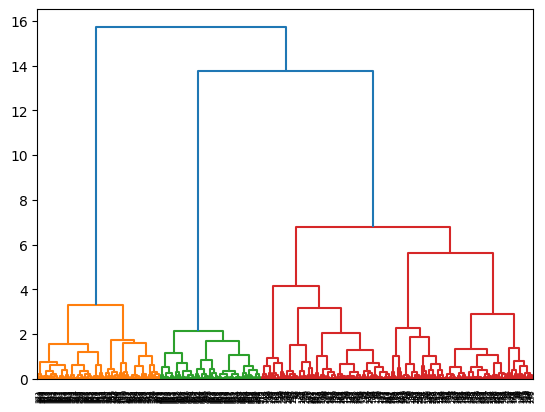

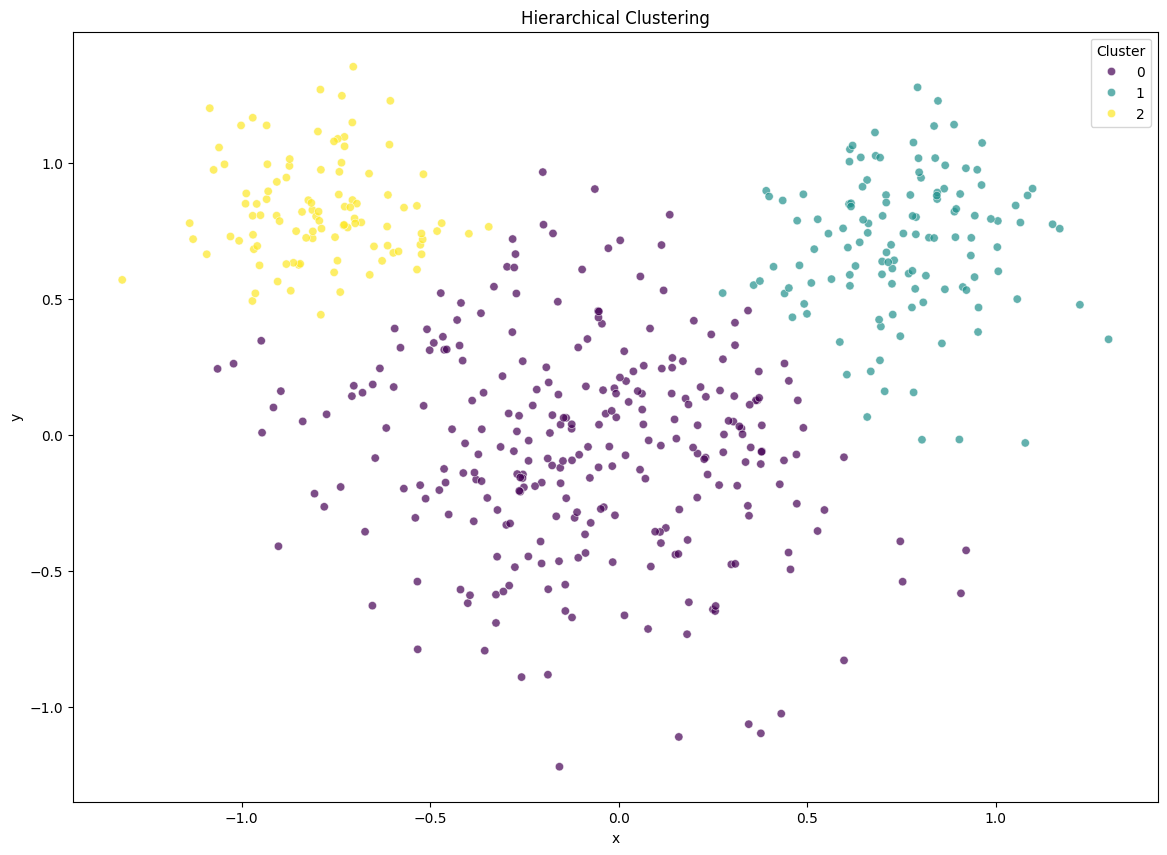

Optymalna liczba klastrów:
3


In [ ]:

# second part of the code - for secondary question
# let's use hierarchical clustering, where we don't assume a priori how many clusters we want

# loading necessary libraries
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# ward method will minimize variance within clusters
clustering = linkage(data_X, method="ward", metric="euclidean")

# displaying dendogram
dend = dendrogram(clustering)
plt.show()

# getting the optimal number of clusters
nb_colors = set(dend['color_list'])
nb_clusters = len(nb_colors) - 1

clusters = AgglomerativeClustering(n_clusters = nb_clusters, metric = 'euclidean', linkage = 'ward')

# drawing plot displaying how clustering worked
plt.figure(figsize=(14, 10))
sns.scatterplot(x=data_X[:, 0], y=data_X[:, 1], hue=clusters.fit_predict(data_X), palette='viridis',  alpha=0.7)

plt.title("Hierarchical Clustering")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(title="Cluster")
plt.show()

print('Optymalna liczba klastrów:')
print(nb_clusters)



**Secondary Question**

**If we *didn't know* the number of clusters in advance, how could we decide on a suitable $K$ for the clustering algorithm?**

W przypadku, gdy liczba klastrów nie jest znana a priori, można użyć algorytmu Klastrowania Hierarchicznego. Wykorzystano implementację z pakietów *scipy* oraz *sklearn*. Dendogram wizualizuje proces klastrowania danych oraz tworzenia nowych klastrów dla klastrowania hierarchicznego. Zastosowano metodę *ward* dla klastrowania, czyli taką która minimalizuje wariancję wśród ososbnych klastrów. Algorytm wskazał, iż 3 to optymalna liczba klastrów, co jest zgodne z wygenerowanym przez nas zbiorem danych.